In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---
Vehicle Fuel Economy Data
---
---


In [2]:
df = pd.read_csv('../Datasets/Vehicle Fuel Economy Data.csv')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19024\2564468404.py:1: DtypeWarning: Columns (73,75) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Datasets/Vehicle Fuel Economy Data.csv')


In [83]:
df.head()

,Year,Manufacturer,Model,barrels08,barrelsA08,charge240,city08,city08U,cityA08,cityA08U,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,2017,BMW,M6 Coupe,17.500588,0.0,0.0,15.0,14.0,0.0,0.0,...,BMX,NaN,0.0,NaN,04-04-2016,09-09-2016,Y,0.0,0.0,0.0
1,2017,BMW,X3 sDrive28i,12.396250,0.0,0.0,21.0,21.0,0.0,0.0,...,BMX,NaN,0.0,NaN,04-04-2016,22-11-2016,Y,0.0,0.0,0.0
2,2016,Infiniti,Q50S Red Sport,13.523182,0.0,0.0,20.0,19.0,0.0,0.0,...,NSX,NaN,0.0,NaN,04-04-2016,26-09-2016,N,0.0,0.0,0.0
3,2017,MINI,John Cooper Works Convertible,11.018889,0.0,0.0,24.0,23.0,0.0,0.0,...,BMX,NaN,0.0,NaN,12-04-2016,16-09-2016,Y,0.0,0.0,0.0
4,2017,Kia,Sedona SX,14.167143,0.0,0.0,18.0,18.0,0.0,0.0,...,KMX,NaN,0.0,NaN,12-04-2016,02-12-2016,N,0.0,0.0,0.0


In [84]:
df.shape

(46186, 82)

Este Dataset contien gran cantidad de datos puesto que se ecnuentran 82 columnas y 46186 filas, por lo que se considera un Dataset extenso

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46186 entries, 0 to 46185
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             46186 non-null  int64  
 1   Manufacturer     46186 non-null  object 
 2   Model            46176 non-null  object 
 3   barrels08        46169 non-null  float64
 4   barrelsA08       46169 non-null  float64
 5   charge240        46169 non-null  float64
 6   city08           46169 non-null  float64
 7   city08U          46169 non-null  float64
 8   cityA08          46169 non-null  float64
 9   cityA08U         46169 non-null  float64
 10  cityCD           46169 non-null  float64
 11  cityE            46169 non-null  float64
 12  cityUF           46169 non-null  float64
 13  co2              46169 non-null  float64
 14  co2A             46169 non-null  float64
 15  co2TailpipeAGpm  46169 non-null  float64
 16  co2TailpipeGpm   46169 non-null  float64
 17  comb08      

Existen algunas columnas que poseen datos nulos 

In [86]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.precision', 2)

In [87]:
# Obtener el conteo de nulos por columna de df
null_count = df.isnull().sum()

# Obtener el porcentaje de nulos por columna
null_percentage = (df.isnull().mean()) * 100

# Crear un nuevo DataFrame con la información de conteo y porcentaje
null_info = pd.DataFrame({
    'Nulos': null_count,
    'Porcentaje': null_percentage
})

# Imprimir el nuevo DataFrame
print(null_info)

                 Nulos  Porcentaje
Year                 0        0.00
Manufacturer         0        0.00
Model               10        0.02
barrels08           17        0.04
barrelsA08          17        0.04
charge240           17        0.04
city08              17        0.04
city08U             17        0.04
cityA08             17        0.04
cityA08U            17        0.04
cityCD              17        0.04
cityE               17        0.04
cityUF              17        0.04
co2                 17        0.04
co2A                17        0.04
co2TailpipeAGpm     17        0.04
co2TailpipeGpm      17        0.04
comb08              17        0.04
comb08U             17        0.04
combA08             17        0.04
combA08U            17        0.04
combE               17        0.04
combinedCD          17        0.04
combinedUF          17        0.04
cylinders          523        1.13
displ              521        1.13
drive             1203        2.60
engId               

Se puede observar como existen gran cantidad de datos nulos en algunas columnas

---
Funciones para graficar
---
---

In [184]:
def graficar_conteo(colum):
    ret = df[colum].unique()
    if (len(df[colum].unique()) > 30):
        top_30 = df[colum].value_counts().nlargest(30)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=top_30.index, y=top_30.values, palette="bright")
        plt.xlabel(colum)
        plt.ylabel('Frecuencia')
        plt.title(f'Top 30 {colum}')
        plt.xticks(rotation=90) 
        plt.tight_layout()
        plt.show()
        return top_30
    else:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=df[colum], palette='bright')
        plt.xlabel(colum)
        plt.ylabel('Frecuencia')
        plt.title(f'{colum}')
        plt.xticks(rotation=90) 
        plt.show()
        return df[colum].value_counts()

---
Year - Indica el año del en que se fabrico el vehículo
---
---

In [92]:
df['Year'].unique()

array([2017, 2016, 1987, 1985, 2018, 2015, 2019, 1988, 2020, 2021, 2022,
       2023, 1984, 1986, 2010, 2009, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1999, 2000, 2001, 2002, 2003, 2004, 2006, 2008, 1998,
       2011, 2012, 2013, 2014, 2005, 2007, 2024, 1989], dtype=int64)

In [93]:
df['Year'].value_counts()

Year
1984    1964
1985    1701
2018    1348
2019    1343
2022    1316
2017    1293
2021    1281
2015    1280
2016    1262
2023    1260
2020    1254
1987    1247
2014    1221
1986    1210
2008    1187
2009    1181
2013    1180
2005    1166
1989    1153
2012    1147
1991    1132
1988    1130
2007    1126
2011    1126
2004    1122
1992    1121
2010    1106
2006    1104
1993    1093
1990    1078
2003    1044
1994     982
2002     975
1995     967
2001     911
1999     852
2000     840
1998     812
1996     773
1997     762
2024     136
Name: count, dtype: int64

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12584\1856429625.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


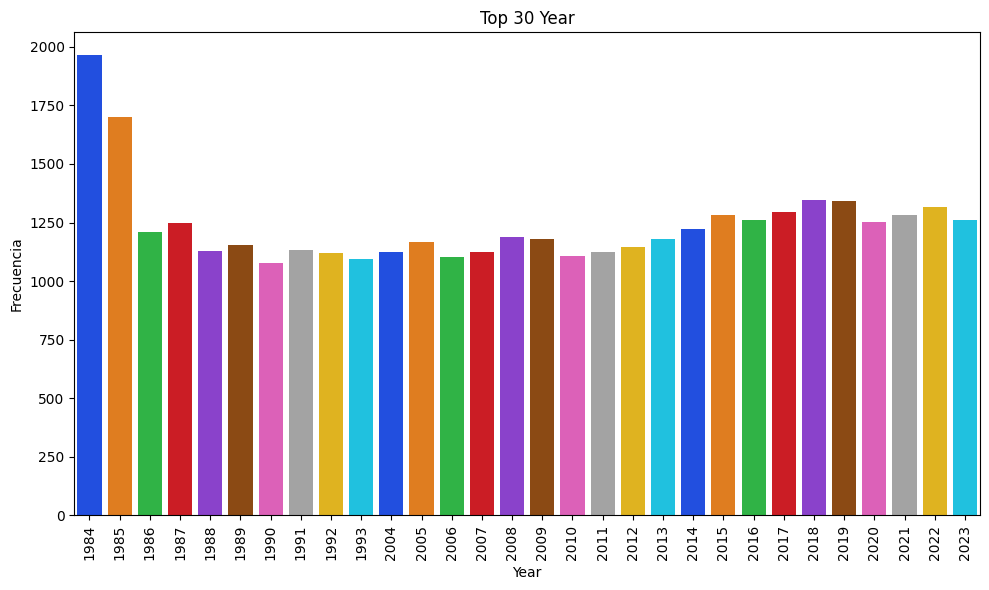

Year
1984    1964
1985    1701
2018    1348
2019    1343
2022    1316
2017    1293
2021    1281
2015    1280
2016    1262
2023    1260
2020    1254
1987    1247
2014    1221
1986    1210
2008    1187
2009    1181
2013    1180
2005    1166
1989    1153
2012    1147
1991    1132
1988    1130
2007    1126
2011    1126
2004    1122
1992    1121
2010    1106
2006    1104
1993    1093
1990    1078
Name: count, dtype: int64

In [94]:
graficar_conteo('Year')

---
Fuel Type & Fuel Type 1
---
---

In [95]:
df['fuelType'].value_counts()

fuelType
Regular                        27985
Premium                        13310
Gasoline or E85                 1387
Diesel                          1100
Electricity                      503
Midgrade                         157
Premium and Electricity          153
Premium or E85                   127
Regular Gas and Electricity       84
CNG                               60
Premium Gas or Electricity        55
Gasoline or natural gas           20
Gasoline or propane                8
Regular Gas or Electricity         4
Name: count, dtype: int64

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12584\1856429625.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[colum], palette='bright')


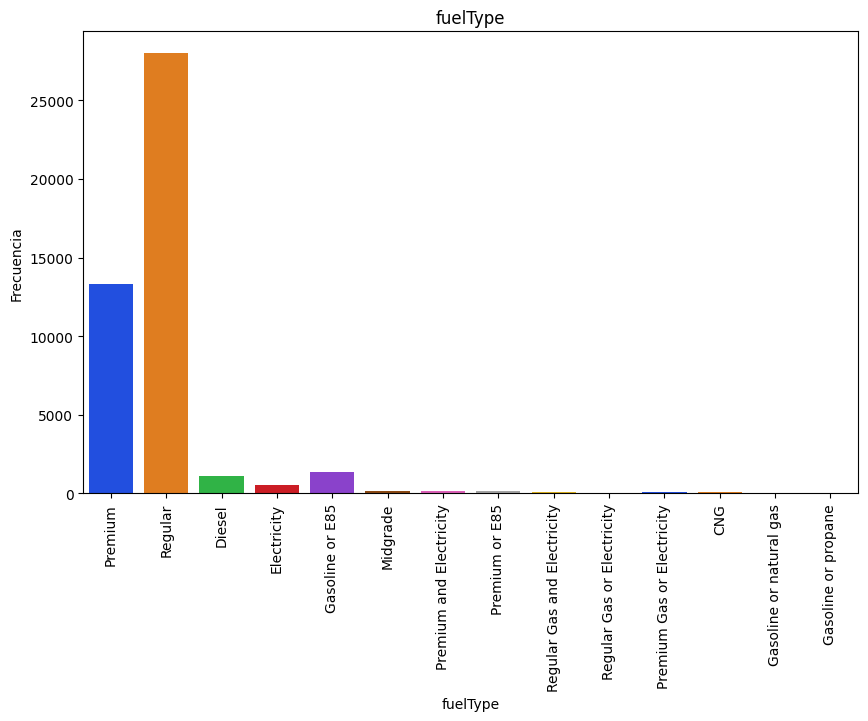

fuelType
Regular                        27985
Premium                        13310
Gasoline or E85                 1387
Diesel                          1100
Electricity                      503
Midgrade                         157
Premium and Electricity          153
Premium or E85                   127
Regular Gas and Electricity       84
CNG                               60
Premium Gas or Electricity        55
Gasoline or natural gas           20
Gasoline or propane                8
Regular Gas or Electricity         4
Name: count, dtype: int64

In [96]:
graficar_conteo('fuelType')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12584\1856429625.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[colum], palette='bright')


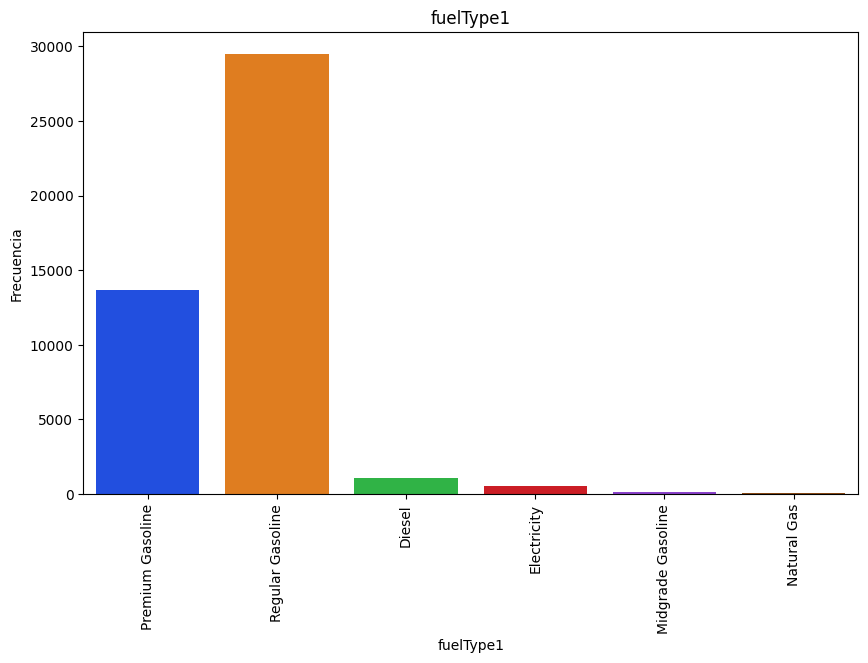

fuelType1
Regular Gasoline     29488
Premium Gasoline     13645
Diesel                1100
Electricity            503
Midgrade Gasoline      157
Natural Gas             60
Name: count, dtype: int64

In [97]:
graficar_conteo('fuelType1')

---
Emisiones de CO2
---
---

In [186]:
df['co2'].sum()

5545119.0

In [5]:
df['co2'].mean()

120.10481058719054

---
Comparacion de costo de combustibles
---
---

In [7]:
df['fuelCost08'].sum()

132039250.0

In [9]:
df['fuelCost08'].mean()

2937.273374413276

In [4]:
df['barrels08'].mean()

15.306719416826292

In [10]:
df['barrels08'].sum()

706695.9287554531


Total de emisiones 5545119 de CO2
---


In [121]:
# Filtro de automoviles donde el combustible sea electricidad
df_filter = df.loc[df['fuelType1'].str.contains( 'Electricity', case=False, na=False)]

In [123]:
df_filter.shape

(503, 53)

In [125]:
pd.reset_option('all')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12584\2786130087.py:1: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option('all')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_12584\2786130087.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


In [126]:
df_filter

,Year,Manufacturer,Model,barrels08,charge240,city08,city08U,cityE,co2,co2A,...,youSaveSpend,atvType,evMotor,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop
20,2016,Tesla,Model S (75 kW-hr battery pack),0.0816,12.0,97.0,97.0,35.0,NaN,-1.0,...,6000.0,EV,285 kW AC Induction (75 kW-hr battery pack),TSL,standard charger,4.0,80 amp dual charger,04-05-2016,26-09-2016,N
187,2017,Kia,Soul Electric,0.0768,4.0,120.0,119.0,28.0,NaN,-1.0,...,6250.0,EV,81 kW AC PMSM,KMX,NaN,NaN,NaN,13-09-2016,05-07-2017,N
239,2017,Hyundai,Ioniq Electric,0.0600,4.0,150.0,150.0,22.0,NaN,-1.0,...,7000.0,EV,88 kW AC PMSM,HYX,NaN,NaN,NaN,16-11-2016,28-11-2017,N
261,2017,Ford,Focus Electric,0.0744,5.0,118.0,118.0,28.0,NaN,-1.0,...,6250.0,EV,107 kW AC PMSM,FMX,NaN,NaN,NaN,16-12-2016,05-07-2017,N
268,2017,Tesla,Model S AWD - 60D,0.0768,12.0,101.0,101.0,33.0,NaN,-1.0,...,6250.0,EV,193 (front) 193 (rear) (60 kW-hr battery pack),TSL,standard charger,3.0,80 amp dual charger,11-01-2017,02-02-2022,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44945,2023,Audi,e-tron S (21/22 inch wheels),0.1272,10.0,62.0,62.0,54.0,NaN,-1.0,...,4000.0,EV,138 kW Asynchron 3-Phase,VGA,NaN,NaN,NaN,17-05-2023,17-05-2023,N
44946,2023,Cadillac,LYRIQ AWD,0.0912,10.0,96.0,96.0,35.0,NaN,-1.0,...,5500.0,EV,155 and 220 kW ACPM,GMX,NaN,NaN,NaN,17-05-2023,17-05-2023,N
44947,2023,Hyundai,Ioniq 6 Long range AWD (18 inch Wheels),0.0672,7.0,130.0,130.0,26.0,NaN,-1.0,...,6500.0,EV,74 and 165 kW PMSM,HYX,NaN,NaN,NaN,17-05-2023,17-05-2023,N
44948,2023,Hyundai,Ioniq 6 Long range RWD (18 inch Wheels),0.0576,7.0,153.0,153.0,21.0,NaN,-1.0,...,7000.0,EV,168 kW PMSM,HYX,NaN,NaN,NaN,17-05-2023,17-05-2023,N


In [127]:
df_filter.describe()

,Year,barrels08,charge240,city08,city08U,cityE,co2,co2A,co2TailpipeGpm,comb08,...,lv4,pv2,pv4,range,rangeCity,rangeHwy,UCity,UHighway,youSaveSpend,charge240b
count,503.000000,503.000000,480.000000,503.000000,476.000000,503.000000,0.0,503.0,0.0,503.000000,...,197.000000,1.0,197.000000,503.000000,334.000000,334.000000,503.000000,503.000000,502.000000,113.000000
mean,2018.924453,0.087168,9.225000,102.330020,103.970588,34.646123,NaN,-1.0,NaN,97.642147,...,19.299492,86.0,96.685279,225.491054,228.574850,212.598802,143.364775,129.921975,5690.737052,5.513274
std,5.170621,0.024446,2.906224,23.054207,21.464075,10.397576,NaN,0.0,NaN,19.872381,...,7.079480,NaN,6.832727,96.461083,99.081148,98.404330,33.671765,24.545509,1037.278632,2.035906
min,1998.000000,0.057600,3.000000,28.000000,49.000000,21.000000,NaN,-1.0,NaN,28.000000,...,8.000000,86.0,72.000000,29.000000,42.000000,31.000000,35.851100,39.186000,-3250.000000,2.000000
25%,2017.000000,0.072000,7.000000,84.500000,86.000000,27.000000,NaN,-1.0,NaN,83.000000,...,15.000000,86.0,91.000000,153.000000,130.000000,117.000000,116.203450,114.150000,5250.000000,4.000000
50%,2021.000000,0.081600,10.000000,103.000000,104.000000,32.000000,NaN,-1.0,NaN,100.000000,...,17.000000,86.0,97.000000,239.000000,247.500000,228.000000,142.600000,133.200000,6000.000000,4.000000
75%,2022.000000,0.097200,12.000000,122.000000,122.000000,40.000000,NaN,-1.0,NaN,112.000000,...,24.000000,86.0,101.000000,289.000000,293.250000,282.750000,172.900000,145.000000,6250.000000,8.000000
max,2023.000000,0.290400,19.000000,153.000000,153.000000,122.000000,NaN,-1.0,NaN,142.000000,...,35.000000,86.0,112.000000,520.000000,520.000000,520.000000,224.800000,187.100000,7000.000000,9.000000


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1736 entries, 20 to 46183
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            1736 non-null   int64  
 1   Manufacturer    1736 non-null   object 
 2   Model           1726 non-null   object 
 3   barrels08       1719 non-null   float64
 4   charge240       480 non-null    float64
 5   city08          1719 non-null   float64
 6   city08U         476 non-null    float64
 7   cityE           503 non-null    float64
 8   co2             1216 non-null   float64
 9   co2A            1719 non-null   float64
 10  co2TailpipeGpm  1216 non-null   float64
 11  comb08          1719 non-null   float64
 12  comb08U         476 non-null    float64
 13  combE           503 non-null    float64
 14  cylinders       1216 non-null   float64
 15  displ           1216 non-null   float64
 16  drive           1551 non-null   object 
 17  engId           1667 non-null   floa

In [129]:
# Eliminando columnas con valores nulos
df_filter = df_filter.dropna(axis=1, how='all')
df_filter

,Year,Manufacturer,Model,barrels08,charge240,city08,city08U,cityE,co2A,comb08,...,youSaveSpend,atvType,evMotor,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop
20,2016,Tesla,Model S (75 kW-hr battery pack),0.0816,12.0,97.0,97.0,35.0,-1.0,98.0,...,6000.0,EV,285 kW AC Induction (75 kW-hr battery pack),TSL,standard charger,4.0,80 amp dual charger,04-05-2016,26-09-2016,N
187,2017,Kia,Soul Electric,0.0768,4.0,120.0,119.0,28.0,-1.0,105.0,...,6250.0,EV,81 kW AC PMSM,KMX,NaN,NaN,NaN,13-09-2016,05-07-2017,N
239,2017,Hyundai,Ioniq Electric,0.0600,4.0,150.0,150.0,22.0,-1.0,136.0,...,7000.0,EV,88 kW AC PMSM,HYX,NaN,NaN,NaN,16-11-2016,28-11-2017,N
261,2017,Ford,Focus Electric,0.0744,5.0,118.0,118.0,28.0,-1.0,107.0,...,6250.0,EV,107 kW AC PMSM,FMX,NaN,NaN,NaN,16-12-2016,05-07-2017,N
268,2017,Tesla,Model S AWD - 60D,0.0768,12.0,101.0,101.0,33.0,-1.0,104.0,...,6250.0,EV,193 (front) 193 (rear) (60 kW-hr battery pack),TSL,standard charger,3.0,80 amp dual charger,11-01-2017,02-02-2022,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44945,2023,Audi,e-tron S (21/22 inch wheels),0.1272,10.0,62.0,62.0,54.0,-1.0,63.0,...,4000.0,EV,138 kW Asynchron 3-Phase,VGA,NaN,NaN,NaN,17-05-2023,17-05-2023,N
44946,2023,Cadillac,LYRIQ AWD,0.0912,10.0,96.0,96.0,35.0,-1.0,89.0,...,5500.0,EV,155 and 220 kW ACPM,GMX,NaN,NaN,NaN,17-05-2023,17-05-2023,N
44947,2023,Hyundai,Ioniq 6 Long range AWD (18 inch Wheels),0.0672,7.0,130.0,130.0,26.0,-1.0,121.0,...,6500.0,EV,74 and 165 kW PMSM,HYX,NaN,NaN,NaN,17-05-2023,17-05-2023,N
44948,2023,Hyundai,Ioniq 6 Long range RWD (18 inch Wheels),0.0576,7.0,153.0,153.0,21.0,-1.0,140.0,...,7000.0,EV,168 kW PMSM,HYX,NaN,NaN,NaN,17-05-2023,17-05-2023,N


In [130]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 503 entries, 20 to 44949
Data columns (total 49 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          503 non-null    int64  
 1   Manufacturer  503 non-null    object 
 2   Model         503 non-null    object 
 3   barrels08     503 non-null    float64
 4   charge240     480 non-null    float64
 5   city08        503 non-null    float64
 6   city08U       476 non-null    float64
 7   cityE         503 non-null    float64
 8   co2A          503 non-null    float64
 9   comb08        503 non-null    float64
 10  comb08U       476 non-null    float64
 11  combE         503 non-null    float64
 12  drive         495 non-null    object 
 13  engId         479 non-null    float64
 14  eng_dscr      10 non-null     object 
 15  feScore       503 non-null    float64
 16  fuelCost08    503 non-null    float64
 17  fuelType      503 non-null    object 
 18  fuelType1     503 non-null    ob

In [131]:
df_filter = df_filter.replace(0, np.nan).dropna(axis=1, how='all')

In [132]:
df_filter

,Year,Manufacturer,Model,barrels08,charge240,city08,city08U,cityE,co2A,comb08,...,youSaveSpend,atvType,evMotor,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop
20,2016,Tesla,Model S (75 kW-hr battery pack),0.0816,12.0,97.0,97.0,35.0,-1.0,98.0,...,6000.0,EV,285 kW AC Induction (75 kW-hr battery pack),TSL,standard charger,4.0,80 amp dual charger,04-05-2016,26-09-2016,N
187,2017,Kia,Soul Electric,0.0768,4.0,120.0,119.0,28.0,-1.0,105.0,...,6250.0,EV,81 kW AC PMSM,KMX,NaN,NaN,NaN,13-09-2016,05-07-2017,N
239,2017,Hyundai,Ioniq Electric,0.0600,4.0,150.0,150.0,22.0,-1.0,136.0,...,7000.0,EV,88 kW AC PMSM,HYX,NaN,NaN,NaN,16-11-2016,28-11-2017,N
261,2017,Ford,Focus Electric,0.0744,5.0,118.0,118.0,28.0,-1.0,107.0,...,6250.0,EV,107 kW AC PMSM,FMX,NaN,NaN,NaN,16-12-2016,05-07-2017,N
268,2017,Tesla,Model S AWD - 60D,0.0768,12.0,101.0,101.0,33.0,-1.0,104.0,...,6250.0,EV,193 (front) 193 (rear) (60 kW-hr battery pack),TSL,standard charger,3.0,80 amp dual charger,11-01-2017,02-02-2022,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44945,2023,Audi,e-tron S (21/22 inch wheels),0.1272,10.0,62.0,62.0,54.0,-1.0,63.0,...,4000.0,EV,138 kW Asynchron 3-Phase,VGA,NaN,NaN,NaN,17-05-2023,17-05-2023,N
44946,2023,Cadillac,LYRIQ AWD,0.0912,10.0,96.0,96.0,35.0,-1.0,89.0,...,5500.0,EV,155 and 220 kW ACPM,GMX,NaN,NaN,NaN,17-05-2023,17-05-2023,N
44947,2023,Hyundai,Ioniq 6 Long range AWD (18 inch Wheels),0.0672,7.0,130.0,130.0,26.0,-1.0,121.0,...,6500.0,EV,74 and 165 kW PMSM,HYX,NaN,NaN,NaN,17-05-2023,17-05-2023,N
44948,2023,Hyundai,Ioniq 6 Long range RWD (18 inch Wheels),0.0576,7.0,153.0,153.0,21.0,-1.0,140.0,...,7000.0,EV,168 kW PMSM,HYX,NaN,NaN,NaN,17-05-2023,17-05-2023,N


In [133]:
df = df_filter

In [134]:
df

,Year,Manufacturer,Model,barrels08,charge240,city08,city08U,cityE,co2A,comb08,...,youSaveSpend,atvType,evMotor,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop
20,2016,Tesla,Model S (75 kW-hr battery pack),0.0816,12.0,97.0,97.0,35.0,-1.0,98.0,...,6000.0,EV,285 kW AC Induction (75 kW-hr battery pack),TSL,standard charger,4.0,80 amp dual charger,04-05-2016,26-09-2016,N
187,2017,Kia,Soul Electric,0.0768,4.0,120.0,119.0,28.0,-1.0,105.0,...,6250.0,EV,81 kW AC PMSM,KMX,NaN,NaN,NaN,13-09-2016,05-07-2017,N
239,2017,Hyundai,Ioniq Electric,0.0600,4.0,150.0,150.0,22.0,-1.0,136.0,...,7000.0,EV,88 kW AC PMSM,HYX,NaN,NaN,NaN,16-11-2016,28-11-2017,N
261,2017,Ford,Focus Electric,0.0744,5.0,118.0,118.0,28.0,-1.0,107.0,...,6250.0,EV,107 kW AC PMSM,FMX,NaN,NaN,NaN,16-12-2016,05-07-2017,N
268,2017,Tesla,Model S AWD - 60D,0.0768,12.0,101.0,101.0,33.0,-1.0,104.0,...,6250.0,EV,193 (front) 193 (rear) (60 kW-hr battery pack),TSL,standard charger,3.0,80 amp dual charger,11-01-2017,02-02-2022,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44945,2023,Audi,e-tron S (21/22 inch wheels),0.1272,10.0,62.0,62.0,54.0,-1.0,63.0,...,4000.0,EV,138 kW Asynchron 3-Phase,VGA,NaN,NaN,NaN,17-05-2023,17-05-2023,N
44946,2023,Cadillac,LYRIQ AWD,0.0912,10.0,96.0,96.0,35.0,-1.0,89.0,...,5500.0,EV,155 and 220 kW ACPM,GMX,NaN,NaN,NaN,17-05-2023,17-05-2023,N
44947,2023,Hyundai,Ioniq 6 Long range AWD (18 inch Wheels),0.0672,7.0,130.0,130.0,26.0,-1.0,121.0,...,6500.0,EV,74 and 165 kW PMSM,HYX,NaN,NaN,NaN,17-05-2023,17-05-2023,N
44948,2023,Hyundai,Ioniq 6 Long range RWD (18 inch Wheels),0.0576,7.0,153.0,153.0,21.0,-1.0,140.0,...,7000.0,EV,168 kW PMSM,HYX,NaN,NaN,NaN,17-05-2023,17-05-2023,N


C:\Users\Usuario\AppData\Local\Temp\ipykernel_12584\3899599917.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[colum], palette='bright')


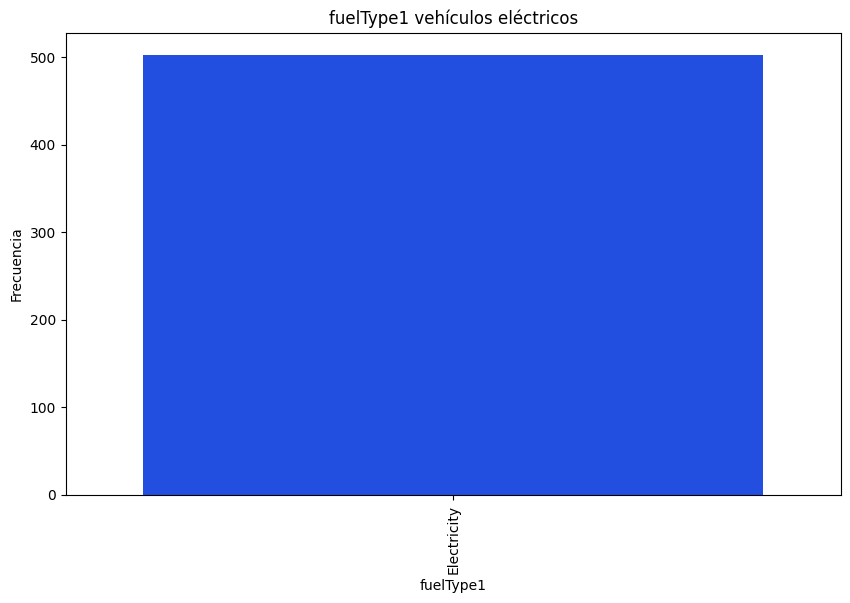

fuelType1
Electricity    503
Name: count, dtype: int64

In [135]:
graficar_conteo('fuelType1')

In [136]:
df[df['fuelType'].isna()]

,Year,Manufacturer,Model,barrels08,charge240,city08,city08U,cityE,co2A,comb08,...,youSaveSpend,atvType,evMotor,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop


In [137]:
df.describe()

,Year,barrels08,charge240,city08,city08U,cityE,co2A,comb08,comb08U,combE,...,lv4,pv2,pv4,range,rangeCity,rangeHwy,UCity,UHighway,youSaveSpend,charge240b
count,503.000000,503.000000,480.000000,503.000000,476.000000,503.000000,503.0,503.000000,476.000000,503.000000,...,197.000000,1.0,197.000000,503.000000,334.000000,334.000000,503.000000,503.000000,502.000000,113.000000
mean,2018.924453,0.087168,9.225000,102.330020,103.970588,34.646123,-1.0,97.642147,99.195378,35.986083,...,19.299492,86.0,96.685279,225.491054,228.574850,212.598802,143.364775,129.921975,5690.737052,5.513274
std,5.170621,0.024446,2.906224,23.054207,21.464075,10.397576,0.0,19.872381,17.959770,10.232448,...,7.079480,NaN,6.832727,96.461083,99.081148,98.404330,33.671765,24.545509,1037.278632,2.035906
min,1998.000000,0.057600,3.000000,28.000000,49.000000,21.000000,-1.0,28.000000,48.000000,23.000000,...,8.000000,86.0,72.000000,29.000000,42.000000,31.000000,35.851100,39.186000,-3250.000000,2.000000
25%,2017.000000,0.072000,7.000000,84.500000,86.000000,27.000000,-1.0,83.000000,85.000000,30.000000,...,15.000000,86.0,91.000000,153.000000,130.000000,117.000000,116.203450,114.150000,5250.000000,4.000000
50%,2021.000000,0.081600,10.000000,103.000000,104.000000,32.000000,-1.0,100.000000,101.000000,33.000000,...,17.000000,86.0,97.000000,239.000000,247.500000,228.000000,142.600000,133.200000,6000.000000,4.000000
75%,2022.000000,0.097200,12.000000,122.000000,122.000000,40.000000,-1.0,112.000000,112.000000,40.000000,...,24.000000,86.0,101.000000,289.000000,293.250000,282.750000,172.900000,145.000000,6250.000000,8.000000
max,2023.000000,0.290400,19.000000,153.000000,153.000000,122.000000,-1.0,142.000000,141.000000,121.000000,...,35.000000,86.0,112.000000,520.000000,520.000000,520.000000,224.800000,187.100000,7000.000000,9.000000


In [138]:
df.columns

Index(['Year', 'Manufacturer', 'Model', 'barrels08', 'charge240', 'city08',
       'city08U', 'cityE', 'co2A', 'comb08', 'comb08U', 'combE', 'drive',
       'engId', 'eng_dscr', 'feScore', 'fuelCost08', 'fuelType', 'fuelType1',
       'ghgScore', 'ghgScoreA', 'highway08', 'highway08U', 'VClass',
       'highwayE', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'mpgData', 'pv2', 'pv4',
       'range', 'rangeCity', 'rangeHwy', 'trany', 'UCity', 'UHighway',
       'youSaveSpend', 'atvType', 'evMotor', 'mfrCode', 'c240Dscr',
       'charge240b', 'c240bDscr', 'createdOn', 'modifiedOn', 'startStop'],
      dtype='object')

---
Solo vehiculos electricos
---
---

In [139]:
# Obtener el conteo de nulos por columna de df
null_count = df.isnull().sum()

# Obtener el porcentaje de nulos por columna
null_percentage = (df.isnull().mean()) * 100

# Crear un nuevo DataFrame con la información de conteo y porcentaje
null_info = pd.DataFrame({
    'Nulos': null_count,
    'Porcentaje': null_percentage
})

# Imprimir el nuevo DataFrame
print(null_info)

              Nulos  Porcentaje
Year              0    0.000000
Manufacturer      0    0.000000
Model             0    0.000000
barrels08         0    0.000000
charge240        23    4.572565
city08            0    0.000000
city08U          27    5.367793
cityE             0    0.000000
co2A              0    0.000000
comb08            0    0.000000
comb08U          27    5.367793
combE             0    0.000000
drive             8    1.590457
engId            24    4.771372
eng_dscr        493   98.011928
feScore           0    0.000000
fuelCost08        0    0.000000
fuelType          0    0.000000
fuelType1         0    0.000000
ghgScore          0    0.000000
ghgScoreA         0    0.000000
highway08         0    0.000000
highway08U       27    5.367793
VClass            0    0.000000
highwayE          0    0.000000
hlv             364   72.365805
hpv             364   72.365805
id                0    0.000000
lv2             502   99.801193
lv4             306   60.834990
mpgData 

In [140]:
def graficar_conteo(colum):
    ret = df[colum].unique()
    if (len(df[colum].unique()) > 30):
        top_30 = df[colum].value_counts().nlargest(30)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=top_30.index, y=top_30.values, palette="bright")
        plt.xlabel(colum)
        plt.ylabel('Frecuencia')
        plt.title(f'Top 30 {colum} vehiculos electricos')
        plt.xticks(rotation=90) 
        plt.tight_layout()
        plt.show()
        return top_30
    else:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=df[colum], palette='bright')
        plt.xlabel(colum)
        plt.ylabel('Frecuencia')
        plt.title(f'{colum} vehículos eléctricos')
        plt.xticks(rotation=90) 
        plt.show()
        return df[colum].value_counts()

In [141]:
df.columns

Index(['Year', 'Manufacturer', 'Model', 'barrels08', 'charge240', 'city08',
       'city08U', 'cityE', 'co2A', 'comb08', 'comb08U', 'combE', 'drive',
       'engId', 'eng_dscr', 'feScore', 'fuelCost08', 'fuelType', 'fuelType1',
       'ghgScore', 'ghgScoreA', 'highway08', 'highway08U', 'VClass',
       'highwayE', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'mpgData', 'pv2', 'pv4',
       'range', 'rangeCity', 'rangeHwy', 'trany', 'UCity', 'UHighway',
       'youSaveSpend', 'atvType', 'evMotor', 'mfrCode', 'c240Dscr',
       'charge240b', 'c240bDscr', 'createdOn', 'modifiedOn', 'startStop'],
      dtype='object')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12584\3899599917.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[colum], palette='bright')


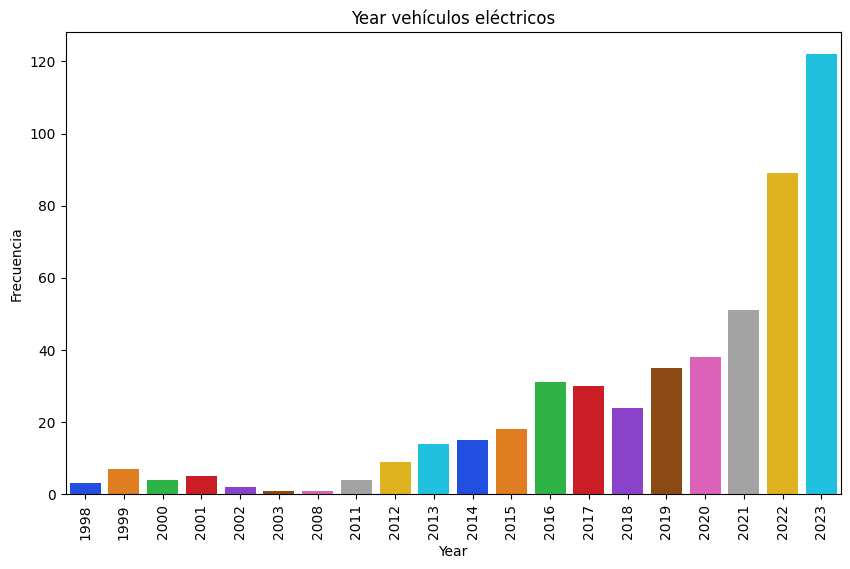

Year
2023    122
2022     89
2021     51
2020     38
2019     35
2016     31
2017     30
2018     24
2015     18
2014     15
2013     14
2012      9
1999      7
2001      5
2000      4
2011      4
1998      3
2002      2
2003      1
2008      1
Name: count, dtype: int64

In [142]:
graficar_conteo('Year')

Los vehiculos electricos ya existian anteriormente, en la epoca de los 2000 surgió con gran auge los motores de combustión, sin embargo, hoy en dia nuevamente están resurgiendo los vehiculos electricos 

---
Manufacturer
---
---

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12584\3899599917.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


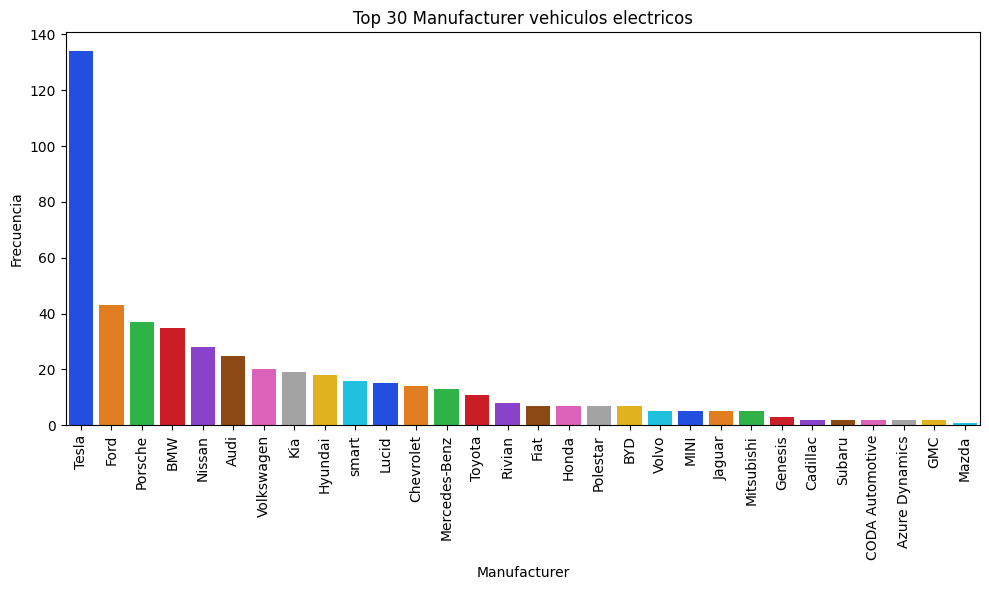

Manufacturer
Tesla              134
Ford                43
Porsche             37
BMW                 35
Nissan              28
Audi                25
Volkswagen          20
Kia                 19
Hyundai             18
smart               16
Lucid               15
Chevrolet           14
Mercedes-Benz       13
Toyota              11
Rivian               8
Fiat                 7
Honda                7
Polestar             7
BYD                  7
Volvo                5
MINI                 5
Jaguar               5
Mitsubishi           5
Genesis              3
Cadillac             2
Subaru               2
CODA Automotive      2
Azure Dynamics       2
GMC                  2
Mazda                1
Name: count, dtype: int64

In [143]:
graficar_conteo('Manufacturer')

Tesla, Ford y Porsche se encuentran a la delantera en cuanto a fabricantes de vehiculos electricos

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12584\2324817180.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Manufacturer', y='barrels08', data=top_10_menos_consumo, palette='bright')


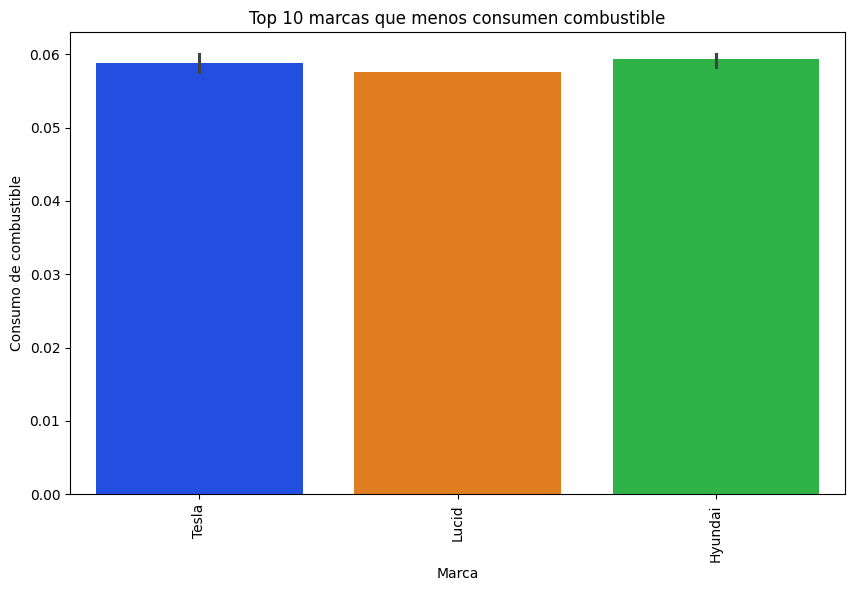

In [146]:
consumo_combustible_por_marca = df.groupby('Manufacturer')['barrels08'].mean().sort_values(ascending=False).reset_index()
top_10_menos_consumo = df.nsmallest(10, 'barrels08')

plt.figure(figsize=(10,6))
sns.barplot(x='Manufacturer', y='barrels08', data=top_10_menos_consumo, palette='bright')
plt.xlabel('Marca')
plt.ylabel('Consumo de combustible')
plt.title('Top 10 marcas que menos consumen combustible')
plt.xticks(rotation=90)
plt.show()

In [147]:
consumo_combustible_por_marca

,Manufacturer,barrels08
0,Plymouth,0.230400
1,Dodge,0.230400
2,GMC,0.157200
3,Azure Dynamics,0.129600
4,BYD,0.120000
5,Rivian,0.117600
6,Lordstown,0.115200
7,CODA Automotive,0.110400
8,Porsche,0.105795
9,Audi,0.104160


In [148]:
df

,Year,Manufacturer,Model,barrels08,charge240,city08,city08U,cityE,co2A,comb08,...,youSaveSpend,atvType,evMotor,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop
20,2016,Tesla,Model S (75 kW-hr battery pack),0.0816,12.0,97.0,97.0,35.0,-1.0,98.0,...,6000.0,EV,285 kW AC Induction (75 kW-hr battery pack),TSL,standard charger,4.0,80 amp dual charger,04-05-2016,26-09-2016,N
187,2017,Kia,Soul Electric,0.0768,4.0,120.0,119.0,28.0,-1.0,105.0,...,6250.0,EV,81 kW AC PMSM,KMX,NaN,NaN,NaN,13-09-2016,05-07-2017,N
239,2017,Hyundai,Ioniq Electric,0.0600,4.0,150.0,150.0,22.0,-1.0,136.0,...,7000.0,EV,88 kW AC PMSM,HYX,NaN,NaN,NaN,16-11-2016,28-11-2017,N
261,2017,Ford,Focus Electric,0.0744,5.0,118.0,118.0,28.0,-1.0,107.0,...,6250.0,EV,107 kW AC PMSM,FMX,NaN,NaN,NaN,16-12-2016,05-07-2017,N
268,2017,Tesla,Model S AWD - 60D,0.0768,12.0,101.0,101.0,33.0,-1.0,104.0,...,6250.0,EV,193 (front) 193 (rear) (60 kW-hr battery pack),TSL,standard charger,3.0,80 amp dual charger,11-01-2017,02-02-2022,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44945,2023,Audi,e-tron S (21/22 inch wheels),0.1272,10.0,62.0,62.0,54.0,-1.0,63.0,...,4000.0,EV,138 kW Asynchron 3-Phase,VGA,NaN,NaN,NaN,17-05-2023,17-05-2023,N
44946,2023,Cadillac,LYRIQ AWD,0.0912,10.0,96.0,96.0,35.0,-1.0,89.0,...,5500.0,EV,155 and 220 kW ACPM,GMX,NaN,NaN,NaN,17-05-2023,17-05-2023,N
44947,2023,Hyundai,Ioniq 6 Long range AWD (18 inch Wheels),0.0672,7.0,130.0,130.0,26.0,-1.0,121.0,...,6500.0,EV,74 and 165 kW PMSM,HYX,NaN,NaN,NaN,17-05-2023,17-05-2023,N
44948,2023,Hyundai,Ioniq 6 Long range RWD (18 inch Wheels),0.0576,7.0,153.0,153.0,21.0,-1.0,140.0,...,7000.0,EV,168 kW PMSM,HYX,NaN,NaN,NaN,17-05-2023,17-05-2023,N


---
Marcas con menor cantidad de emisiones de CO2
---
---

In [150]:
df.columns

Index(['Year', 'Manufacturer', 'Model', 'barrels08', 'charge240', 'city08',
       'city08U', 'cityE', 'co2A', 'comb08', 'comb08U', 'combE', 'drive',
       'engId', 'eng_dscr', 'feScore', 'fuelCost08', 'fuelType', 'fuelType1',
       'ghgScore', 'ghgScoreA', 'highway08', 'highway08U', 'VClass',
       'highwayE', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'mpgData', 'pv2', 'pv4',
       'range', 'rangeCity', 'rangeHwy', 'trany', 'UCity', 'UHighway',
       'youSaveSpend', 'atvType', 'evMotor', 'mfrCode', 'c240Dscr',
       'charge240b', 'c240bDscr', 'createdOn', 'modifiedOn', 'startStop'],
      dtype='object')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12584\229083481.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Manufacturer', y='co2A', data=df_co2, palette='bright')


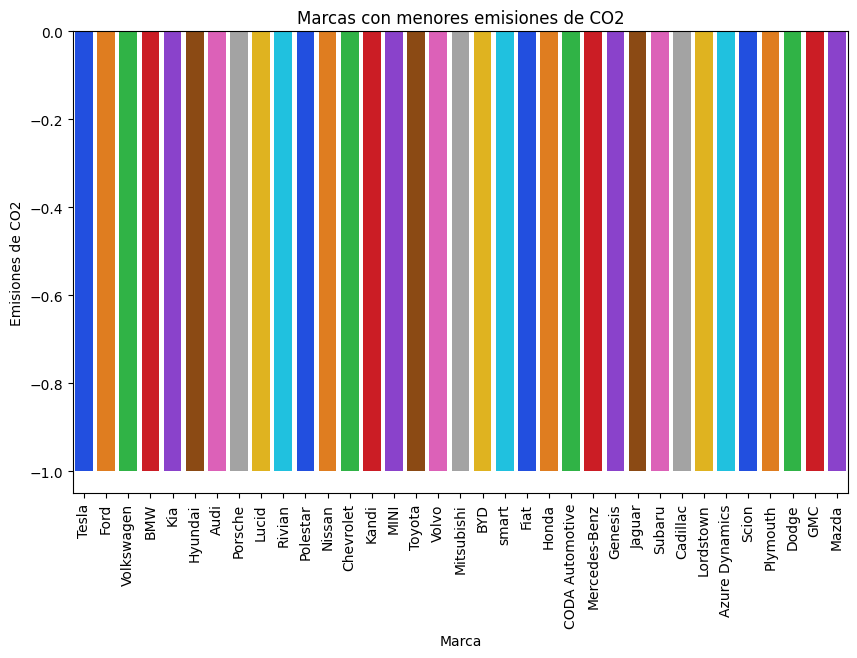

In [155]:
# Ordenar por emisiones de CO2 en orden descendente
df_co2 = df.sort_values('co2A', ascending=True)

# Seleccionar las 10 marcas con mayores emisiones de CO2
top_10_co2 = df_co2.head(10)

# Graficar las marcas y sus emisiones de CO2
plt.figure(figsize=(10,6))
sns.barplot(x='Manufacturer', y='co2A', data=df_co2, palette='bright')
plt.xlabel('Marca')
plt.ylabel('Emisiones de CO2')
plt.title('Marcas con menores emisiones de CO2')
plt.xticks(rotation=90)
plt.show()

In [157]:
df_co2['co2A'].mean()

-1.0

---
Marcas con menor tiempo de carga por cada 240 millas
---
---

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12584\1394893351.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Manufacturer', y='charge240', data=top_10_promedio_carga, palette='bright')


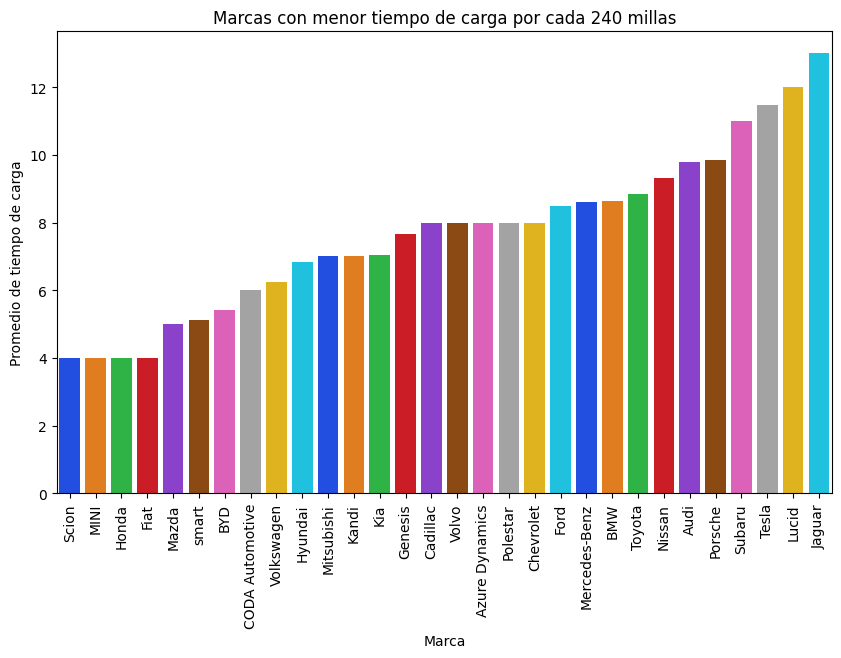

In [181]:
promedio_carga = df.groupby('Manufacturer')['charge240'].mean().reset_index()
promedio_carga = promedio_carga.sort_values('charge240', ascending=True)
top_10_promedio_carga = promedio_carga.head(30)
plt.figure(figsize=(10,6))
sns.barplot(x='Manufacturer', y='charge240', data=top_10_promedio_carga, palette='bright')
plt.xlabel('Marca')
plt.ylabel('Promedio de tiempo de carga')
plt.title('Marcas con menor tiempo de carga por cada 240 millas')
plt.xticks(rotation=90)
plt.show()